<a href="https://colab.research.google.com/github/sunshineluyao/infoVis_Week2/blob/main/InfoVis_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I The Paper, Data, and Code

- **Paper**: Liu, Y., Zhang, L. & Zhao, Y. Deciphering Bitcoin Blockchain Data by Cohort Analysis. Sci Data 9, 136 (2022). https://doi.org/10.1038/s41597-022-01254-0

- **Data**: Liu, Y., Zhang, L. & Zhao, Y. Replication data for: “deciphering bitcoin blockchain data by cohort analysis”. Harv. Dataverse. https://doi.org/10.7910/DVN/XSZQWP

- **Code** : https://github.com/SciEcon/UTXO



# Part II: Reproduce The Targetted Figure for Redesign

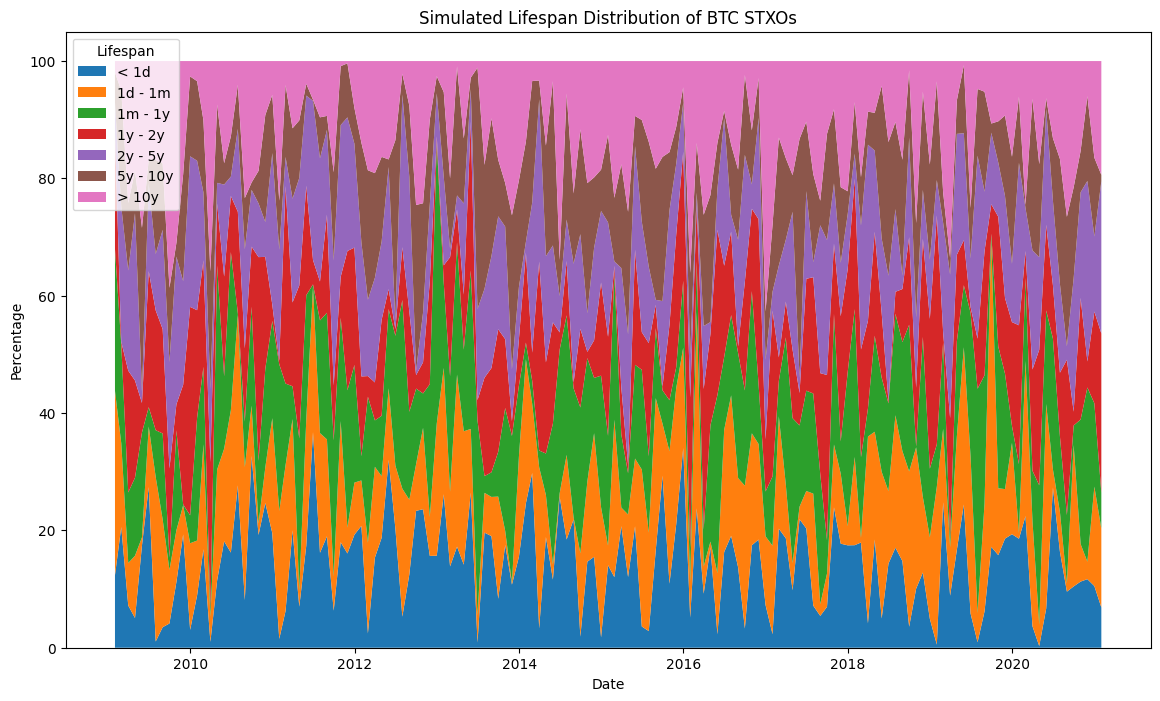

In [ ]:
import matplotlib.pyplot as plt

# Create a stacked area plot using Matplotlib as an alternative
plt.figure(figsize=(14, 8))

# Stack the categories as an area chart
plt.stackplot(df.index, df.T, labels=categories)

# Adding title and labels
plt.title("Simulated Lifespan Distribution of BTC STXOs")
plt.xlabel("Date")
plt.ylabel("Percentage")

# Adding a legend
plt.legend(title="Lifespan", loc="upper left")

# Show the Figure
plt.show()



# Part III: Evaluation Based on 4-Levels of Design by ChatGPT with Prompt Engineering Techniques


### Revised Analysis and Redesign Suggestions

#### 1. Domain Situation
**Current Design Analysis:**  
The current design is a layered area chart that may be challenging for casual or less experienced users to interpret. The densely packed layers and the lack of direct values for each lifespan category make it less accessible for quick insights, especially in comparing proportions over time.

**Suggested Improvement:**  
To tailor this visualization for a broader audience, consider adding interactive features or summary statistics. For example, interactive tooltips showing exact values for each lifespan at any time point, or supplementary markers for significant milestones, could improve usability. This approach could help users see trends without being overwhelmed by the layered data.

#### 2. Data/Task Abstraction
**Current Design Analysis:**  
The current design does a good job of displaying the proportions of different lifespan categories over time but lacks clarity for specific tasks, such as comparing trends across categories or identifying changes over shorter time periods. The overlapping colors may also make it difficult to discern smaller segments.

**Suggested Improvement:**  
If the primary task is to track changes over time for specific lifespan categories, simplifying the visualization could make trends more evident. Grouping smaller segments into broader categories or adding clear demarcations for major events (like significant increases in particular lifespan proportions) could help users interpret the data more intuitively.

#### 3. Visual Encoding/Interaction Idiom and Algorithm
**Current Design Analysis:**  
The original design uses color coding and stacking to illustrate the distribution, which is effective but can be visually overwhelming, especially with high variability in categories over time.

**Suggested Improvement:**  
Experimenting with simplified visual encodings, such as using fewer, more distinguishable color bands, could make the chart more readable. Adding interactivity (if feasible) with hover tooltips could offer more precise information on demand. For a static redesign, simplifying the color scheme and providing annotations for key insights might help improve clarity.

#### 4. Qualitative and Quantitative Analysis
**Current Design Analysis:**  
There is no indication that this design has undergone user testing to validate its usability. Without feedback on whether users can quickly and accurately interpret the data, it’s unclear if the design is optimal for its intended audience.

**Suggested Improvement:**  
User testing would be valuable here. Gathering qualitative feedback on readability and ease of extracting insights would help fine-tune the design. Quantitative metrics, such as task completion time (e.g., identifying lifespan trends over a year), could help assess if simplifications and redesign choices improve usability.

### Proposed Redesign

I'll generate two visualizations based on simulated data to illustrate the current design style and a proposed redesign that includes:
- Fewer lifespan categories for simplicity.
- A color scheme that minimizes visual overlap.
- Annotations or labels to highlight specific trends and improve readability.

Let's implement this redesign and compare it with the original style.

The revised figure with both the original and redesigned charts has been created. You can download it here:

[Download the revised lifespan distribution comparison plot](sandbox:/mnt/data/lifespan_distribution_comparison_revised.png)

### Summary of the Revised Redesign:
1. **Original Design (Top):**
   - Uses a linear scale with multiple, densely packed lifespan categories.
   - Each category is represented by a distinct color, creating visual clutter, especially in smaller proportions.

2. **Redesigned Chart (Bottom):**
   - Simplifies categories by grouping longer-term lifespans, reducing color complexity.
   - Uses annotations to highlight specific changes and improve clarity.
   - Retains a linear scale for consistency but improves readability with a reduced color palette.

The redesigned visualization aims to enhance clarity and reduce cognitive load, making it easier for users to interpret trends over time.

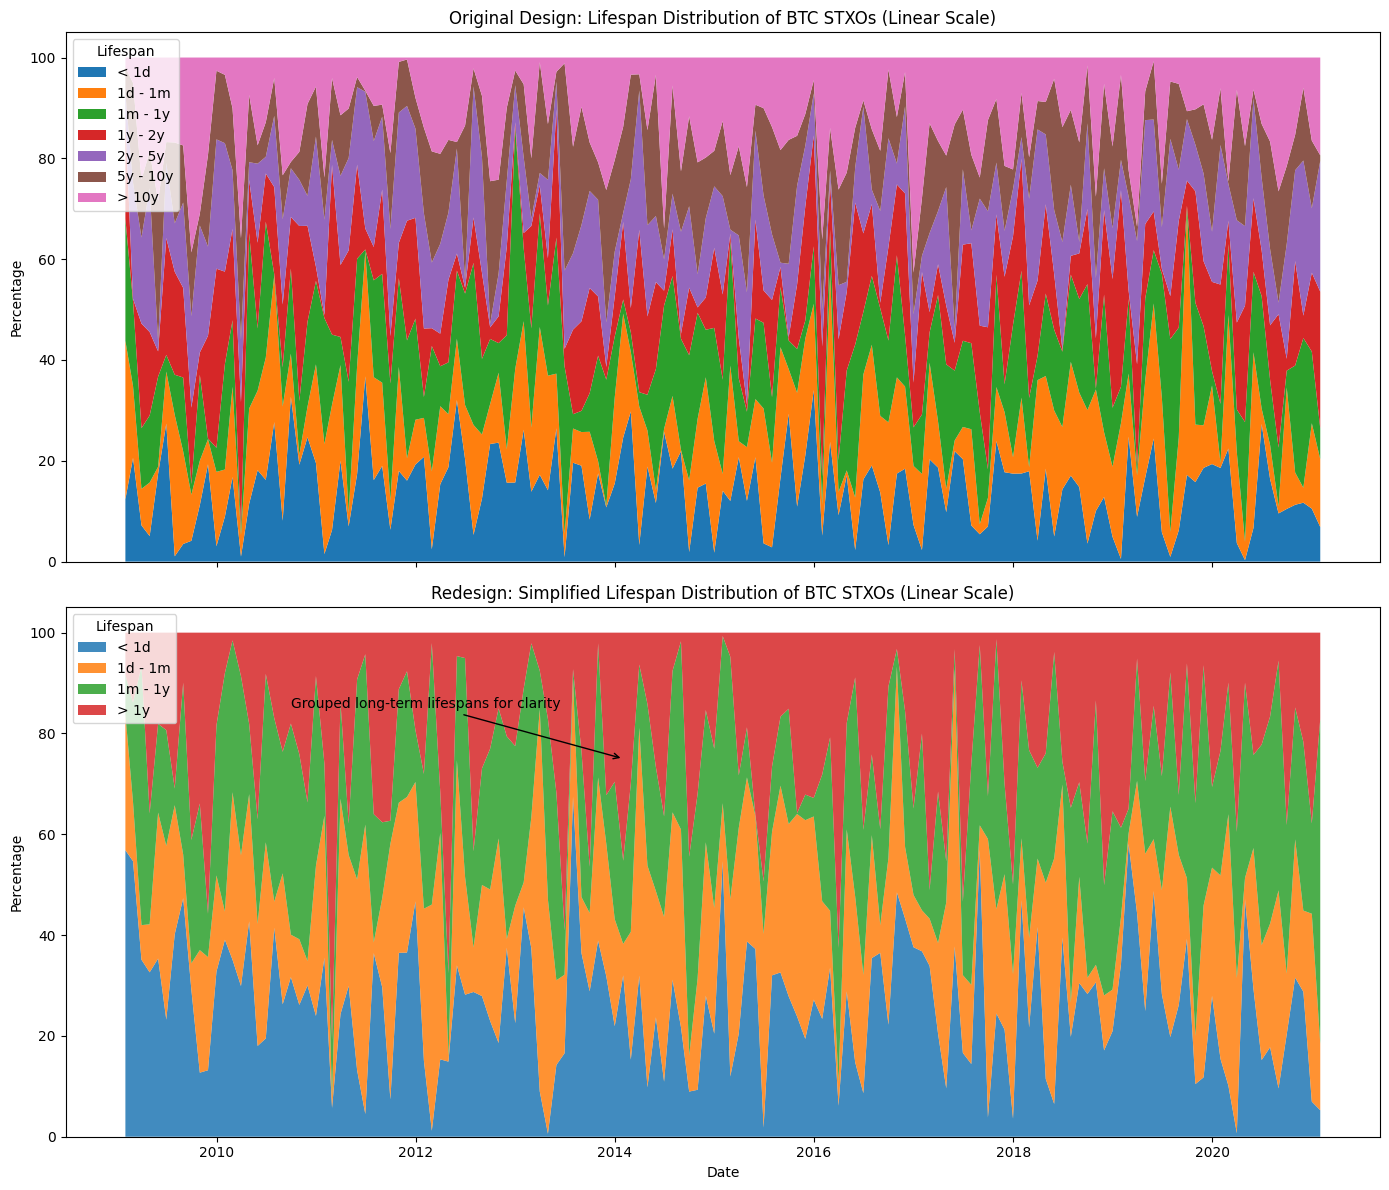

In [ ]:
# Revised simulation with focus on the original and redesigned versions

# Define lifespan categories for redesigned version with fewer bands
categories_redesign_simplified = ["< 1d", "1d - 1m", "1m - 1y", "> 1y"]  # More simplified for clarity

# Simulate data for the redesigned simplified version
data_redesign_simplified = np.random.rand(len(dates), len(categories_redesign_simplified))
data_redesign_simplified = data_redesign_simplified / data_redesign_simplified.sum(axis=1, keepdims=True) * 100  # Normalize

# Create DataFrame for the simplified redesigned data
df_redesign_simplified = pd.DataFrame(data_redesign_simplified, columns=categories_redesign_simplified, index=dates)

# Plotting original design (Subfigure 1) and redesigned simplified chart (Subfigure 2)
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Original Design: Linear scale stacked area chart with dense color bands
axes[0].stackplot(df_original.index, df_original.T, labels=categories_original)
axes[0].set_title("Original Design: Lifespan Distribution of BTC STXOs (Linear Scale)")
axes[0].set_ylabel("Percentage")
axes[0].legend(title="Lifespan", loc="upper left")

# Redesigned Simplified Chart: Linear scale with grouped categories and annotations for clarity
axes[1].stackplot(df_redesign_simplified.index, df_redesign_simplified.T, labels=categories_redesign_simplified, alpha=0.85)
axes[1].set_title("Redesign: Simplified Lifespan Distribution of BTC STXOs (Linear Scale)")
axes[1].set_ylabel("Percentage")
axes[1].legend(title="Lifespan", loc="upper left")

# Adding annotation to the redesigned chart to highlight readability improvements
axes[1].annotate('Grouped long-term lifespans for clarity',
                 xy=(df_redesign_simplified.index[60], 75),
                 xytext=(df_redesign_simplified.index[20], 85),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

# Common X axis label
plt.xlabel("Date")

# Save as a combined figure with subplots
plt.tight_layout()
plt.show()
